# CORRELATION

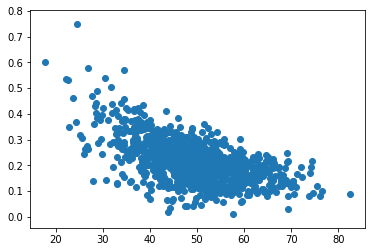

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

pages = np.random.normal(50,10,1000)
purchase = np.random.normal(10,3,1000)/pages
plt.scatter(pages,purchase)

In [2]:
np.corrcoef(pages,purchase)


array([[ 1.       , -0.5735404],
       [-0.5735404,  1.       ]])

In [3]:
np.cov(pages,purchase)

array([[ 9.39189694e+01, -4.59151020e-01],
       [-4.59151020e-01,  6.82385452e-03]])

# LINEAR REGRESSION

-0.004888799595754919 0.4564296071109747 -0.5735403995150427 1.5630085519220288e-88 0.0002210298079341599
range(20, 80) [0.35865362 0.35376482 0.34887602 0.34398722 0.33909842 0.33420962
 0.32932082 0.32443202 0.31954322 0.31465442 0.30976562 0.30487682
 0.29998802 0.29509922 0.29021042 0.28532162 0.28043282 0.27554402
 0.27065522 0.26576642 0.26087762 0.25598882 0.25110002 0.24621122
 0.24132242 0.23643363 0.23154483 0.22665603 0.22176723 0.21687843
 0.21198963 0.20710083 0.20221203 0.19732323 0.19243443 0.18754563
 0.18265683 0.17776803 0.17287923 0.16799043 0.16310163 0.15821283
 0.15332403 0.14843523 0.14354643 0.13865763 0.13376883 0.12888003
 0.12399123 0.11910244 0.11421364 0.10932484 0.10443604 0.09954724
 0.09465844 0.08976964 0.08488084 0.07999204 0.07510324 0.07021444]


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


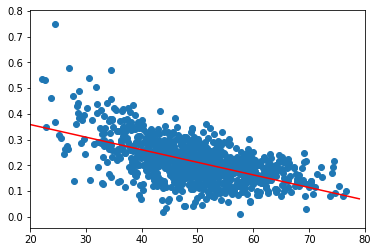

In [4]:
import scipy.stats as stats
from sklearn.metrics import r2_score

m,q,r,p,e = stats.linregress(pages,purchase)

print(m,q,r,p,e)

def predict(x):
    return x*m + q

x = range(20,80)
y = predict(x)

print(x,y)

plt.scatter(pages,purchase)
axes = plt.axes()
axes.set_xlim([20,80])
plt.plot(x,y,c="r")
plt.show()

In [5]:
print("r^2 value: ",str(round(r ** 2,2)))

r^2 value:  0.33


# POLYNOMIAL REGRESSION

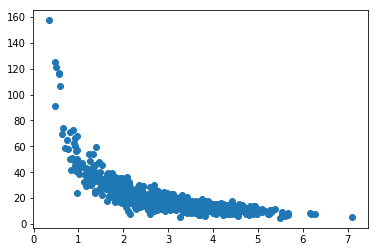

In [6]:
np.random.seed(2)
pages = np.random.normal(3.0,1.0,1000)
purchases = np.random.normal(50.0,10.0,1000)/pages

plt.scatter(pages,purchases)

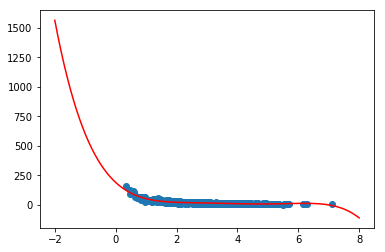

In [29]:
import numpy as np

x = np.array(pages)
y = np.array(purchases)

fp = np.poly1d(np.polyfit(x,y,5))

xp = np.linspace(-2,8,100)
plt.plot(xp,fp(xp),c="r")
plt.scatter(x,y)
plt.show()

In [30]:
r2 = r2_score(y,fp(x))
print("Valore R^2: " + str(round(r2,2)))

Valore R^2: 0.86


# MULTIPLE REGRESSION 

Variabili multiple che danno 1 risultato
price = a + b1 * mileage + b2 * age + b3 * doors

Ordinary Least Squares

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_excel("http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls")
df.head()




,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
df1 = df[['Mileage','Price']]
bins = np.arange(0,50000,10000)
groups = df1.groupby(pd.cut(df1['Mileage'],bins)).mean()
print(groups.head())

                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267


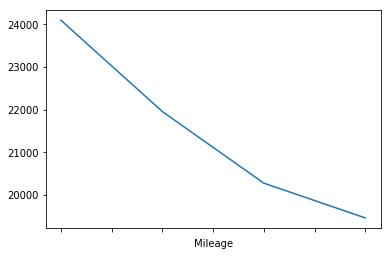

In [7]:
groups['Price'].plot.line()

In [49]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Mileage','Cylinder','Doors']]
y = df['Price']



Xn = pd.DataFrame(scale.fit_transform(X),columns=['Mileage','Cylinder','Doors'])

Xn.head()


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Mileage,Cylinder,Doors
0,-1.417485,0.52741,0.556279
1,-1.305902,0.52741,0.556279
2,-0.810128,0.52741,0.556279
3,-0.426058,0.52741,0.556279
4,0.000008,0.52741,0.556279


In [32]:
est = sm.OLS(y,Xn).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     18.11
Date:                Sat, 02 May 2020   Prob (F-statistic):           2.23e-11
Time:                        09:25:23   Log-Likelihood:                -9207.1
No. Observations:                 804   AIC:                         1.842e+04
Df Residuals:                     801   BIC:                         1.843e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage    -1272.3412    804.623     -1.581      0.114   -2851.759     307.077
Cylinder    5587.4472    804.509      6.945      0.000    4008.252    7166.642
Doors      -1404.5513    804.275     -1.746      0.081   -2983.288     174.185
==============================================================================
Omnibus:                      157.913   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.529
Skew:                           1.278   Prob(JB):                     1.20e-56
Kurtosis:                       4.074   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
print(y.groupby(X['Doors']).mean())
print(y.groupby(X.Cylinder).mean())

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64
Cylinder
4    17862.564874
6    20081.395841
8    38968.043180
Name: Price, dtype: float64


In [46]:
val = scale.transform([[40000,8,4],[45000,8,4]])
print(val)
predicted = est.predict(val)
print(predicted)


[[2.46215627 1.96971667 0.55627894]
 [3.07256589 1.96971667 0.55627894]]
[7091.66262801 6315.01330583]
